# E-tivity 2: Data Preparation

### Name: Barry O' Dubhain

### Student ID: 21384401

## A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

This is a description of the what the attributes represent.

#### Input variables:
#### bank client data:
1. **age**: age of client (numeric)
2. **job**: type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **balance**: the balance in the clients current account
7. **housing**: has housing loan? (categorical: 'no','yes','unknown')
8. **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
9. **contact**: contact communication type (categorical: 'cellular','telephone')
10. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
13. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. **previous**: number of contacts performed before this campaign and for this client (numeric)
16. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
17. **subscribed**: has the client subscribed a term deposit? (binary: 'yes','no')

source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [2]:
df = pd.read_csv("./bank.csv")

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Verify the quility of the dataset by identifying the number of missing (NaN) values in the dataset.

In [5]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [6]:
df_org = df.copy(deep=True)

After a visual examination of the dataset we can conclued that the missing values for the **poutcome** column are an indication of clients that have never previously been contacted.

### Drop columns that are not useful

I considered dropping the 'contact' feature because because I don't intuitively see how it adds any information. It is true that people may respond to various means of communication differently, for example, written vs spoken communication but on inspection I found that all examples were of 'cellular' or 'telephone', whether the communication was spoken or via text was not specified. After discussing this in the Q&A session I was informed that the dataset is older than I had assumed it was and the feature does indeed correlate somewhat with the target feature so I decided to keep it in the dataset. In heinsight this show that a feature should not neccessarily be dropped on intuition alone, dropping a column should be justified via analytics.

In [7]:
print(df_org['contact'].unique())

['cellular' 'telephone' nan]


In [8]:
# df.drop('contact', axis=1, inplace=True)

## B. Process and Encode the Categorical Features

The **poutcome** feature and the **contact** feature both have a large number of NaN values. After a visual examination of the dataset we can conclued that the missing values for the poutcome column are an indication of clients that have never previously been contacted and as such the NaN values represent a legitimate category of not applicable or 'na'. There is no way to determine if the NaN values in the contact feature represent a legitimate category so instead of dropping the column we will encode them as an 'unknown' category because the known values may yet provide some insight.

In [9]:
df['poutcome'] = df['poutcome'].fillna('na')

In [10]:
df['contact'] = df['contact'].fillna("unknown")

### Encode Ordinal Categorical Attributes 

The **education** feature is the only truely ordinal feature in the dataset. The **job** attribute is partially ordinal as it will presumably correlate with income level but to set ordinal values would be a subjective exercise so I have therefore decided to treat it as a non-ordinal categorical feature. The education feature has a number of missing values so we will encode them with the most common category.

In [11]:
print(f"List of unique categories in the 'education' column: {df['education'].unique()}\
\nThe number of NaN values in the 'education' column: {df['education'].isna().sum()}")

List of unique categories in the 'education' column: ['tertiary' 'secondary' nan 'primary']
The number of NaN values in the 'education' column: 104


In [12]:
df['education'] = df['education'].fillna(df['education'].value_counts().idxmax())

print(f"List of unique categories in the 'education' column: {df['education'].unique()}\
\nThe number of NaN values in the 'education' column: {df['education'].isna().sum()}")

List of unique categories in the 'education' column: ['tertiary' 'secondary' 'primary']
The number of NaN values in the 'education' column: 0


In [13]:
scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

print(f"List of unique categories in the 'education' column: {df['education'].unique()}")

List of unique categories in the 'education' column: [2 1 0]


### Encode Cyclical Attributes 

The features day and month are cyclical features meaning that they are ordinal by they wrap so that the first and last values are as close as any adjacent values. A typical ordinal encoding will not capture this so we need to use another means of encoding these features. 

In [14]:
df['day'] = np.sin(2 * np.pi * df['day']/30)

In [15]:
print(f"Month column before: {df['month'].unique()}")

month_mapper = {
    "jan": 0,
    "feb": 1,
    "mar": 2,
    "apr": 3,
    "may": 4,
    "jun": 5,
    "jul": 6,
    "aug": 7,
    "sep": 8,
    "oct": 9,
    "nov": 10,
    "dec": 11
}

df['month'] = df['month'].replace(month_mapper)

print(f"Month column after:  {df['month'].unique()}")

Month column before: ['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep']
Month column after:  [ 3 11  1  0  2  4 10  9  7  6  5  8]


In [16]:
df['month'] = np.sin(2 * np.pi * df['month']/11)

The pdays attribute indicates the number of days that passed by after the client was last contacted from a previous campaign. This column contains many -1 values, The site: https://archive.ics.uci.edu/ml/datasets/bank+marketing describes this dataset and for the pdays column it states that "numeric; 999 means client was not previously contacted" the value 999 does not appear in this version of the dataset, by visually examining columns previous and poutcome we can conclued that the -1 values are the 999 values referred to. I will therefore convert them back to 999 as -1 values will influence the average value and 999 is a more accurate representation of a client that has never been contacted.

In [17]:
df['pdays'].mask(df['pdays'] == -1, 999, inplace=True)

There are a number of missing values in the job attribute, we will encode them with a new category 'unknown'.

In [18]:
print(f"List of unique categories in the 'education' column: {df['job'].unique()}\
\nThe number of NaN values in the 'education' column: {df['job'].isna().sum()}")

List of unique categories in the 'education' column: ['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan]
The number of NaN values in the 'education' column: 10


In [19]:
df['job'] = df['job'].fillna("unknown")

print(f"List of unique categories in the 'education' column: {df['job'].unique()}\
\nThe number of NaN values in the 'education' column: {df['job'].isna().sum()}")

List of unique categories in the 'education' column: ['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 'unknown']
The number of NaN values in the 'education' column: 0


 ### One-Hot Encode All Other Categorical Attributes

The **marital**, **housing**, **default**, **loan**, **month**, **job**, **poutcome** features are categorical/boolean features and will be one-hot encoded. None of these features have nan values. job has 10 NaN values but because I have decided to treat this feature as non-ordinal the NaN values can be treated as a category.

In [20]:
print(f"default: {df_org['default'].unique()}\
\nhousing: {df_org['housing'].unique()}\
\nloan: {df_org['loan'].unique()}\
\nmarital: {df_org['marital'].unique()}\
\njob: {df_org['job'].unique()}\
\npoutcome: {df_org['poutcome'].unique()}")

default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
marital: ['single' 'divorced' 'married']
job: ['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan]
poutcome: ['failure' 'other' 'success' nan]


In [21]:
df = pd.get_dummies(df, columns=['marital', 'housing', 'default', 'loan', 'job', 'poutcome'], drop_first=True)
df.head()

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_na,poutcome_other,poutcome_success
0,32.0,2,392,cellular,0.207912,0.989821,957,2,131,2,...,0,0,0,0,1,0,0,0,0,0
1,39.0,1,688,cellular,0.207912,0.989821,233,2,133,1,...,0,0,0,0,1,0,0,0,0,0
2,59.0,1,1035,cellular,0.207912,0.989821,126,2,239,1,...,1,0,0,0,0,0,0,0,0,0
3,47.0,1,398,cellular,0.207912,0.989821,274,1,238,2,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1,1004,cellular,0.207912,0.989821,479,1,307,1,...,1,0,0,0,0,0,0,0,0,0


In [22]:
print(list(df.columns.values))

['age', 'education', 'balance', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribed', 'marital_married', 'marital_single', 'housing_yes', 'default_yes', 'loan_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'poutcome_na', 'poutcome_other', 'poutcome_success']


## C. Treatment of Missing Values in Numerical Columns

In [23]:
for idx, att in enumerate(list(df.columns.values)):
    if df[att].isna().sum() > 0: 
        print(f"{att} : {df[att].isna().sum()}")

age : 12


In [24]:
print(f"{round(df['age'].isna().sum() / len(df), 2)}% of the 'age' feature is missing values,\
\nthis is less than 25% therefore we will not be dropping this column.")

0.01% of the 'age' feature is missing values,
this is less than 25% therefore we will not be dropping this column.


In order to replace the missing values in the age feature we could just find the mean value for that column and replace the missing values with that: df['age'].fillna(df['age'].mean(), inplace=True) but there are more accurate methods available so instead, we will look to other features that may provide an indication of the age of the example. We will print the box plots of what we deem to be the most indicative features to comfirm our assumptions. I have chosen marital status, whether an example is retired, student or neither and home ownership as indicators of age.

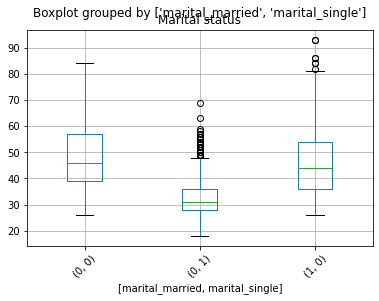

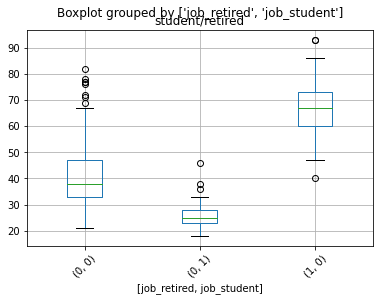

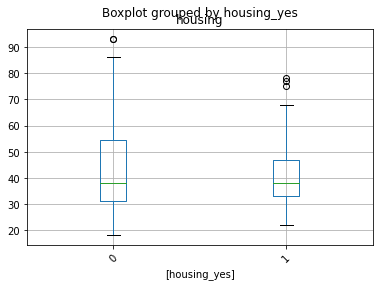

In [25]:
df.boxplot(column='age', by=['marital_married', 'marital_single'], rot=45)
plt.title("Marital status")
plt.show()

df.boxplot(column='age', by=['job_retired', 'job_student'], rot=45)
plt.title("student/retired")
plt.show()

df.boxplot(column='age', by=['housing_yes'], rot=45)
plt.title("housing")
plt.show()

We can see from the box plots that both marital status and job student/retired are good indicators of age but housing is not. We will therefore ignore home ownership for the purposed of estimating the age of examples.

In [38]:
ptable = df.pivot_table(values='age', 
                        index=['job_retired', 'job_student', 'marital_married', 'marital_single'],
                        aggfunc=np.median)
print(ptable)

                                                             age
job_retired job_student marital_married marital_single          
0           0           0               0               0.277778
                                        1              -0.333333
                        1               0               0.222222
            1           0               0               0.000000
                                        1              -0.722222
                        1               0              -0.277778
1           0           0               0               1.611111
                                        1               1.250000
                        1               0               1.611111


In [27]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[
        x['marital_married'], x['marital_single'], x['marital_married'], x['marital_single']]

In [28]:
# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1).squeeze(), inplace=True)

Verify that the dataset has no missing values.

In [29]:
df.isna().sum()

age                  0
education            0
balance              0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
subscribed           0
marital_married      0
marital_single       0
housing_yes          0
default_yes          0
loan_yes             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_unknown          0
poutcome_na          0
poutcome_other       0
poutcome_success     0
dtype: int64

## D. Rescaling Features

In [30]:
print(list(df.columns.values))

['age', 'education', 'balance', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribed', 'marital_married', 'marital_single', 'housing_yes', 'default_yes', 'loan_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'poutcome_na', 'poutcome_other', 'poutcome_success']


In [31]:
robust_scaler = RobustScaler()
df[['age', 
    'education', 
    'balance', 
    'duration', 
    'campaign', 
    'pdays', 
    'previous', 
    'month', 
    'day']] = robust_scaler.fit_transform(df[['age', 
                                              'education', 
                                              'balance', 
                                              'duration', 
                                              'campaign', 
                                              'pdays', 
                                              'previous', 
                                              'month', 
                                              'day']])

In [32]:
df['education'] = df['education']/2

In [33]:
df.head(5)

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_na,poutcome_other,poutcome_success
0,-0.333333,0.5,-0.110187,cellular,-0.185136,0.432953,3.094421,1.0,-0.415913,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0.055556,0.0,0.094941,cellular,-0.185136,0.432953,-0.012876,1.0,-0.408680,-0.5,...,0,0,0,0,1,0,0,0,0,0
2,1.166667,0.0,0.335412,cellular,-0.185136,0.432953,-0.472103,1.0,-0.025316,-0.5,...,1,0,0,0,0,0,0,0,0,0
3,0.500000,0.0,-0.106029,cellular,-0.185136,0.432953,0.163090,0.0,-0.028933,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.888889,0.0,0.313929,cellular,-0.185136,0.432953,1.042918,0.0,0.220615,-0.5,...,1,0,0,0,0,0,0,0,0,0


## E. Treatment of Outliers

In the previous lab exercise, we observed that balance and previous contain some extreme values.

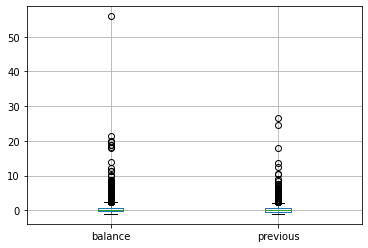

In [34]:
df.boxplot(column=['balance','previous'])
plt.show()

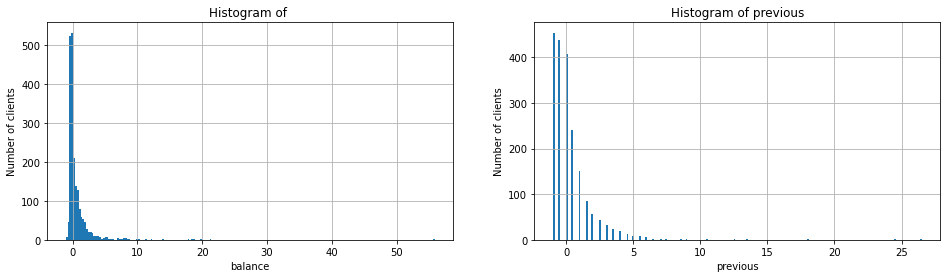

In [35]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of ")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of clients')
df['balance'].hist(bins=200)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of previous")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number of clients')
df['previous'].hist(bins=200)

plt.show()

In [36]:
df[['balance', 'previous']].min()

balance    -1.060984
previous   -1.000000
dtype: float64

In [37]:
print(df['balance'].min())
print(df['previous'].min())

-1.060984060984061
-1.0


In [39]:
# cannot divide by 0 so add a small number
df['balance'] = np.log(df['balance'] - df['balance'].min() + 1)
df['previous'] = np.log(df['previous'] - df['previous'].min() + 1)

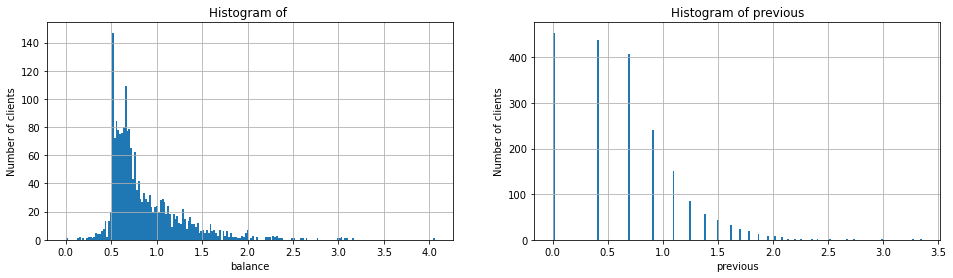

In [40]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of ")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of clients')
df['balance'].hist(bins=200)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of previous")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number of clients')
df['previous'].hist(bins=200)

plt.show()

## F. Creation of Derived Features

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df2.corr());

In [ ]:
possible new feature employed, retired, student, unemployed, unknown

pdays discreatize this column turn to categories eg (not contacted, less than a week, more than a week, more than 1 mnt, more than 3 months)